In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("StatewiseTestingDetails.csv")

In [2]:
df.describe()

,TotalSamples,Positive
count,1.409800e+04,5.503000e+03
mean,4.134384e+06,5.317101e+04
std,6.696029e+06,1.647382e+05
min,5.800000e+01,0.000000e+00
25%,1.252292e+05,4.995000e+02
50%,6.572750e+05,4.372000e+03
75%,5.794283e+06,3.328200e+04
max,5.162290e+07,1.638961e+06


In [3]:
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
14093,2021-06-03,West Bengal,12645747.0,NaN,NaN
14094,2021-06-04,West Bengal,12716953.0,NaN,NaN
14095,2021-06-05,West Bengal,12789625.0,NaN,NaN
14096,2021-06-06,West Bengal,12859678.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14098 entries, 0 to 14097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14098 non-null  object 
 1   State         14098 non-null  object 
 2   TotalSamples  14098 non-null  float64
 3   Negative      6348 non-null   object 
 4   Positive      5503 non-null   float64
dtypes: float64(2), object(3)
memory usage: 550.8+ KB


In [5]:
df.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7750
Positive        8595
dtype: int64

In [6]:
df["Negative"].fillna(method="bfill",inplace=True)
df["Positive"].fillna(method="bfill",inplace=True)
df.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        428
Positive        289
dtype: int64

In [7]:
df["Negative"].fillna(method="ffill",inplace=True)
df["Positive"].fillna(method="ffill",inplace=True)
df.isnull().sum()


Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["Date"])
df["Date"]=le.transform(df["Date"])
le.fit(df["State"])

df["State"]=le.transform(df["State"])
le.fit(df["Negative"])
df["Negative"]=le.transform(df["Negative"])
df

,Date,State,TotalSamples,Negative,Positive
0,16,0,1403.0,390,12.0
1,23,0,2679.0,326,27.0
2,26,0,2848.0,326,33.0
3,30,0,3754.0,326,33.0
4,45,0,6677.0,326,33.0
...,...,...,...,...,...
14093,428,35,12645747.0,4763,135596.0
14094,429,35,12716953.0,4763,135596.0
14095,430,35,12789625.0,4763,135596.0
14096,431,35,12859678.0,4763,135596.0


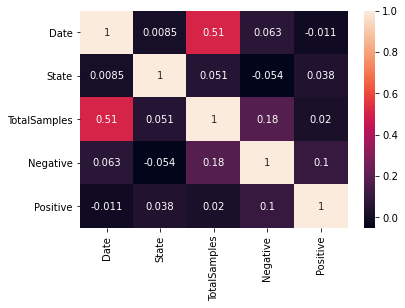

In [9]:
import seaborn as sb
plot=sb.heatmap(df.corr(),annot=True)

<AxesSubplot:>

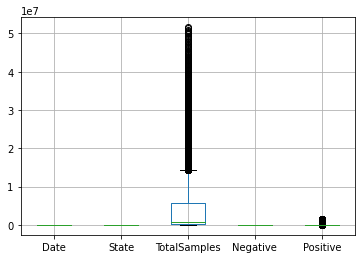

In [10]:
df.boxplot()

In [11]:
df=df[df["TotalSamples"]<2*1000000]

In [12]:
X=df[["TotalSamples","Negative","State"]]
Y=df["Positive"]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [15]:
from sklearn.tree import DecisionTreeClassifier as m
from sklearn.metrics import mean_absolute_error
lr2=m()
lr2.fit(X_train,Y_train)
ans=lr2.predict(X_test)
error=mean_absolute_error(ans,Y_test)

In [16]:
mean=df["Positive"].mean()

In [17]:
error/mean

0.06249741845800303